## FINANCIAL FORECASTING (Regression)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [3]:
df = pd.read_csv("Financial_forecasting.csv")

In [5]:
df.head(6)


,Date,Marketing_Spend,Customer_Count,Discount_Rate(%),Sales_Revenue,Profit,Cost_of_Goods_Sold
0,31/01/2022,6073,500,11.89,51986.86,7852.24,44134.62
1,28/02/2022,4021,264,9.30,52678.74,11937.64,40741.10
2,31/03/2022,6461,544,12.02,58862.60,12514.87,46347.73
3,30/04/2022,5613,526,8.42,65034.35,11921.85,53112.50
4,31/05/2022,8225,208,8.80,60155.06,10104.84,50050.22
5,30/06/2022,6843,543,7.56,61669.87,12373.58,49296.29


In [7]:
df.describe()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                36 non-null     object 
 1   Marketing_Spend     36 non-null     int64  
 2   Customer_Count      36 non-null     int64  
 3   Discount_Rate(%)    36 non-null     float64
 4   Sales_Revenue       36 non-null     float64
 5   Profit              36 non-null     float64
 6   Cost_of_Goods_Sold  36 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 2.1+ KB


(36, 7)

In [9]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
df["Time_Index"] = range(len(df))

C:\Users\PAPA DICKSON\AppData\Local\Temp\ipykernel_8284\1044184235.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


In [10]:
x = df[["Marketing_Spend","Customer_Count","Discount_Rate(%)",
        "Month","Time_Index"]]
y = df["Sales_Revenue"]

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size= 0.2,
                                                 shuffle= False)

In [15]:
model = Ridge(alpha=0.5)
model.fit(x_train,y_train)

Ridge(alpha=0.5)

In [16]:
y_pred = model.predict(x_test)

In [22]:
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'MAE:{mae:,.2f}')
print(f'RMSE:{rmse:,.2f}')


MAE:14,898.86
RMSE:16,123.71


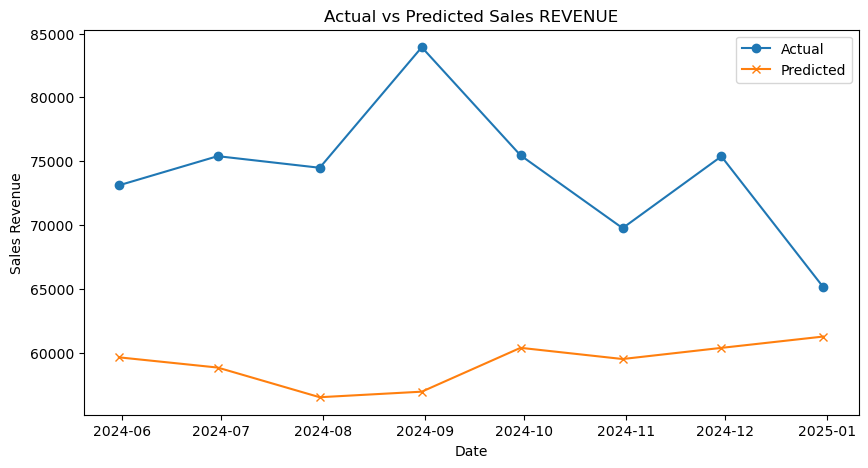

In [23]:
plt.figure(figsize= (10,5))
plt.plot(df["Date"].iloc[-len(y_test):],
         y_test.values,label ="Actual",marker="o")
plt.plot(df["Date"].iloc[-len(y_test):],
         y_pred, label = "Predicted",marker= "x")
plt.title("Actual vs Predicted Sales REVENUE")
plt.xlabel("Date")
plt.ylabel("Sales Revenue")
plt.legend()
plt.show()

### Forecasting into the future,next months

In [30]:

future_dates = pd.date_range(start= df["Date"].iloc[-1] +
pd.offsets.MonthEnd(),periods = 12,freq = "ME")
future_df = pd.DataFrame({
    "Date":future_dates,
    "Marketing_Spend":np.random.randint(4000,12000,12),
    "Customer_Count":np.random.randint(220,650,12),
    "Discount_Rate(%)":np.random.uniform(3,13,12).round(2),
    "Month":future_dates.month,
    "Time_Index":range(len(df),len(df) + 12)
})

future_df["Predicted_Sales"] = model.predict(future_df[["Marketing_Spend",
                                                        "Customer_Count","Discount_Rate(%)",
                                                        "Month","Time_Index"]])

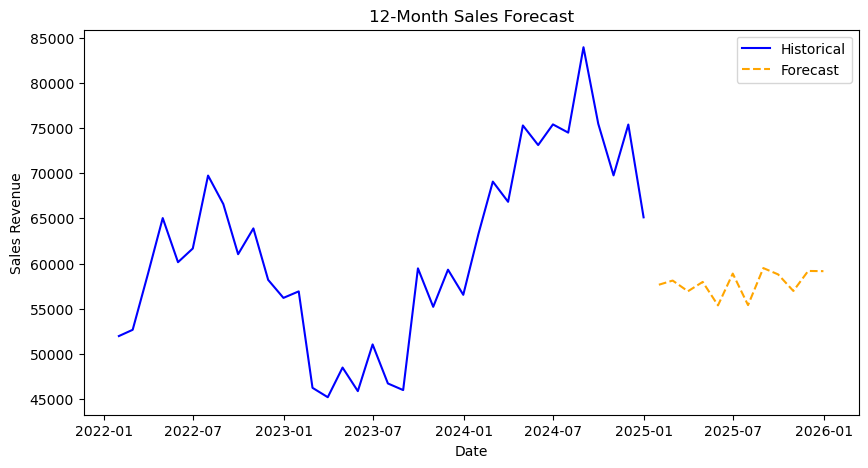

In [37]:
plt.figure(figsize=(10,5))
plt.plot(df["Date"],df["Sales_Revenue"],
         label="Historical",color= "blue")
plt.plot(future_df["Date"], future_df["Predicted_Sales"],
         label = "Forecast",color="orange",linestyle = "--")
plt.title("12-Month Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales Revenue")
plt.legend()
plt.show()
